In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./DataFiles/RegularSeasonCompactResults.csv')

In [4]:
df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [5]:
row = df.to_dict('records')[0]

In [6]:
row

{'DayNum': 20,
 'LScore': 64,
 'LTeamID': 1328,
 'NumOT': 0,
 'Season': 1985,
 'WLoc': 'N',
 'WScore': 81,
 'WTeamID': 1228}

In [7]:
games = []

for row in df.to_dict('records'):
    for perspective in ['W', 'L']:
        game = {}
        game['Won'] = int(perspective == 'W')
        if perspective == 'W':
            team_letter = 'W'
            opp_letter = 'L'
        else:
            team_letter = 'L'
            opp_letter = 'W'
        winner_location = row["WLoc"]
        if winner_location == ' A':
            loser_location = 'H'
        elif winner_location == 'H':
            loser_location = 'A'
        else:
            loser_location = 'N'
        row['LLoc'] = loser_location
        team_stats = [k for k,v in row.items() if k[0] == team_letter]
        opp_stats = [k for k,v in row.items() if k[0] == opp_letter]
    #     print(team_stats)
    #     print(opp_stats)

        for stat in team_stats:
            game_stat = 'Team' + stat[1:]
            game[game_stat] = row[stat]

        for stat in opp_stats:
            opp_stat = 'Opp' + stat[1:]
            game[opp_stat] = row[stat]

        for general_stat in ['DayNum', 'NumOT', 'Season']:
            game[general_stat] = row[general_stat]

        games.append(game)
    
games

[{'DayNum': 20,
  'NumOT': 0,
  'OppLoc': 'N',
  'OppScore': 64,
  'OppTeamID': 1328,
  'Season': 1985,
  'TeamLoc': 'N',
  'TeamScore': 81,
  'TeamTeamID': 1228,
  'Won': 1},
 {'DayNum': 20,
  'NumOT': 0,
  'OppLoc': 'N',
  'OppScore': 81,
  'OppTeamID': 1228,
  'Season': 1985,
  'TeamLoc': 'N',
  'TeamScore': 64,
  'TeamTeamID': 1328,
  'Won': 0},
 {'DayNum': 25,
  'NumOT': 0,
  'OppLoc': 'A',
  'OppScore': 70,
  'OppTeamID': 1354,
  'Season': 1985,
  'TeamLoc': 'H',
  'TeamScore': 77,
  'TeamTeamID': 1106,
  'Won': 1},
 {'DayNum': 25,
  'NumOT': 0,
  'OppLoc': 'H',
  'OppScore': 77,
  'OppTeamID': 1106,
  'Season': 1985,
  'TeamLoc': 'A',
  'TeamScore': 70,
  'TeamTeamID': 1354,
  'Won': 0},
 {'DayNum': 25,
  'NumOT': 0,
  'OppLoc': 'A',
  'OppScore': 56,
  'OppTeamID': 1223,
  'Season': 1985,
  'TeamLoc': 'H',
  'TeamScore': 63,
  'TeamTeamID': 1112,
  'Won': 1},
 {'DayNum': 25,
  'NumOT': 0,
  'OppLoc': 'H',
  'OppScore': 63,
  'OppTeamID': 1112,
  'Season': 1985,
  'TeamLoc': 'A'

In [8]:
games_df = pd.DataFrame(games)

In [9]:
games_df.head()

,DayNum,NumOT,OppLoc,OppScore,OppTeamID,Season,TeamLoc,TeamScore,TeamTeamID,Won
0,20,0,N,64,1328,1985,N,81,1228,1
1,20,0,N,81,1228,1985,N,64,1328,0
2,25,0,A,70,1354,1985,H,77,1106,1
3,25,0,H,77,1106,1985,A,70,1354,0
4,25,0,A,56,1223,1985,H,63,1112,1


In [10]:
games_df.shape

(301368, 10)

In [11]:
df.shape

(150684, 8)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn. model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [13]:
games_df['Total_Score'] = games_df['TeamScore'] + games_df['OppScore']
games_df.head()

,DayNum,NumOT,OppLoc,OppScore,OppTeamID,Season,TeamLoc,TeamScore,TeamTeamID,Won,Total_Score
0,20,0,N,64,1328,1985,N,81,1228,1,145
1,20,0,N,81,1228,1985,N,64,1328,0,145
2,25,0,A,70,1354,1985,H,77,1106,1,147
3,25,0,H,77,1106,1985,A,70,1354,0,147
4,25,0,A,56,1223,1985,H,63,1112,1,119


In [14]:

games_df

,DayNum,NumOT,OppLoc,OppScore,OppTeamID,Season,TeamLoc,TeamScore,TeamTeamID,Won,Total_Score
0,20,0,N,64,1328,1985,N,81,1228,1,145
1,20,0,N,81,1228,1985,N,64,1328,0,145
2,25,0,A,70,1354,1985,H,77,1106,1,147
3,25,0,H,77,1106,1985,A,70,1354,0,147
4,25,0,A,56,1223,1985,H,63,1112,1,119
5,25,0,H,63,1112,1985,A,56,1223,0,119
6,25,0,A,54,1432,1985,H,70,1165,1,124
7,25,0,H,70,1165,1985,A,54,1432,0,124
8,25,0,A,74,1447,1985,H,86,1192,1,160
9,25,0,H,86,1192,1985,A,74,1447,0,160


In [15]:
y = games_df['Won']

features = ['Total_Score', 'Season', 'OppTeamID', 'TeamTeamID', 'NumOT']
X = games_df[features]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()


In [17]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [18]:
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=15)

Train on 226026 samples, validate on 75342 samples
Epoch 1/15
226026/226026 [==============================] - 15s 67us/step - loss: 0.6929 - acc: 0.5082 - val_loss: 0.6930 - val_acc: 0.5085
Epoch 2/15
226026/226026 [==============================] - 15s 65us/step - loss: 0.6927 - acc: 0.5120 - val_loss: 0.6929 - val_acc: 0.5106
Epoch 3/15
226026/226026 [==============================] - 12s 52us/step - loss: 0.6927 - acc: 0.5126 - val_loss: 0.6930 - val_acc: 0.5099
Epoch 4/15
226026/226026 [==============================] - 12s 52us/step - loss: 0.6927 - acc: 0.5125 - val_loss: 0.6929 - val_acc: 0.5100
Epoch 5/15
226026/226026 [==============================] - 13s 58us/step - loss: 0.6926 - acc: 0.5126 - val_loss: 0.6928 - val_acc: 0.5104
Epoch 6/15
226026/226026 [==============================] - 15s 66us/step - loss: 0.6926 - acc: 0.5124 - val_loss: 0.6927 - val_acc: 0.5110
Epoch 7/15
226026/226026 [==============================] - 11s 51us/step - loss: 0.6926 - acc: 0.5128 - val_

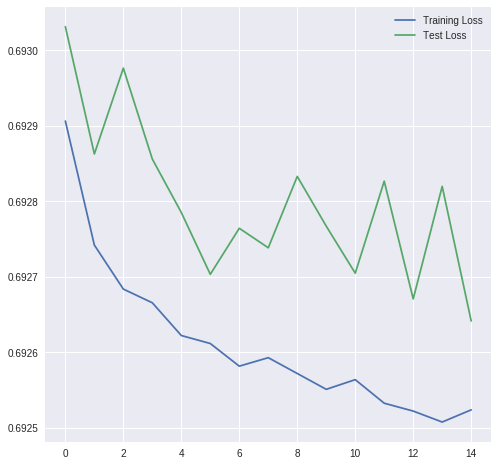

In [19]:
plt.figure(figsize=(8, 8))
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.legend()

In [20]:
preds = model.predict_proba(X_test)

In [21]:
submission = pd.read_csv('./SampleSubmissionStage1.csv')